In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\._test.csv
./input\train.csv
./input\._sample_submission.csv
./input\sample_submission.csv
./input\test.csv


In [18]:
df = pd.read_csv("./input/train.csv")
df.drop(columns="id", inplace=True)
df.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Land Elevation,Total Rainfall,Target
0,18.00,3.1,0.5,0.0,5.90,6.1,14.0,1.8,6.6,1.40,6.7,3.3,0.78,9.3,58.0,494.0,135.48,Likely
1,0.00,0.1,0.0,0.1,8.00,13.0,0.0,0.0,13.0,11.00,0.0,0.0,0.00,0.0,7.8,4.0,53.00,Unlikely
2,0.06,0.0,0.0,0.0,0.02,11.0,5.9,0.0,4.7,0.48,42.0,2.9,0.70,0.0,0.0,40.0,67.76,Unlikely
3,0.00,1.4,2.5,0.0,0.10,0.0,0.0,0.0,0.0,1.80,5.9,36.0,10.00,21.0,18.0,1800.0,96.70,Likely
4,5.00,12.2,0.6,46.0,4.30,7.0,10.2,45.0,0.4,10.60,19.0,0.4,12.00,17.2,34.0,3805.0,223.90,Likely


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day 1           23 non-null     float64
 1   Day 2           23 non-null     float64
 2   Day 3           23 non-null     float64
 3   Day 4           23 non-null     float64
 4   Day 5           23 non-null     float64
 5   Day 6           23 non-null     float64
 6   Day 7           23 non-null     float64
 7   Day 8           23 non-null     float64
 8   Day 9           23 non-null     float64
 9   Day 10          23 non-null     float64
 10  Day 11          23 non-null     float64
 11  Day 12          23 non-null     float64
 12  Day 13          23 non-null     float64
 13  Day 14          23 non-null     float64
 14  Day 15          23 non-null     float64
 15  Land Elevation  23 non-null     float64
 16  Total Rainfall  23 non-null     float64
 17  Target          23 non-null     objec

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day 1,23.0,6.993826,21.267546,0.00,0.0000,0.060,2.3070,100.580
Day 2,23.0,3.608870,6.933950,0.00,0.0005,0.132,2.9000,24.127
Day 3,23.0,0.696696,1.293212,0.00,0.0000,0.200,0.6070,4.600
Day 4,23.0,4.519652,10.595003,0.00,0.0000,0.077,3.2930,46.000
Day 5,23.0,3.012870,5.074194,0.00,0.0000,0.150,3.7055,19.877
Day 6,23.0,11.077565,25.201079,0.00,0.0000,0.417,9.1025,114.259
Day 7,23.0,12.931652,26.622023,0.00,0.0000,4.600,8.7830,115.370
Day 8,23.0,2.823783,9.474697,0.00,0.0000,0.001,0.9925,45.000
Day 9,23.0,4.137130,7.425334,0.00,0.0000,0.400,5.3660,32.000
Day 10,23.0,4.295826,7.971036,0.00,0.0000,0.480,5.9335,34.000


In [21]:
df.describe(include="object")

,Target
count,23
unique,2
top,Likely
freq,12


In [22]:
df["Target"].unique()

array(['Likely', 'Unlikely'], dtype=object)

# Encoding the Target feature

In [23]:
df["Target"] = df["Target"].map({
    "Unlikely": 0,
    "Likely": 1
   
})

df.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Land Elevation,Total Rainfall,Target
0,18.00,3.1,0.5,0.0,5.90,6.1,14.0,1.8,6.6,1.40,6.7,3.3,0.78,9.3,58.0,494.0,135.48,1
1,0.00,0.1,0.0,0.1,8.00,13.0,0.0,0.0,13.0,11.00,0.0,0.0,0.00,0.0,7.8,4.0,53.00,0
2,0.06,0.0,0.0,0.0,0.02,11.0,5.9,0.0,4.7,0.48,42.0,2.9,0.70,0.0,0.0,40.0,67.76,0
3,0.00,1.4,2.5,0.0,0.10,0.0,0.0,0.0,0.0,1.80,5.9,36.0,10.00,21.0,18.0,1800.0,96.70,1
4,5.00,12.2,0.6,46.0,4.30,7.0,10.2,45.0,0.4,10.60,19.0,0.4,12.00,17.2,34.0,3805.0,223.90,1


In [24]:
X = df.drop(columns="Target")
y = df["Target"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Random Forest

In [26]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

Score: 0.8


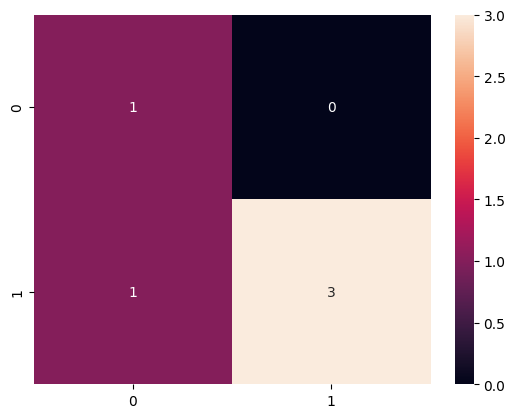

In [27]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score:", score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# XGBoost

In [28]:
clf = XGBClassifier(n_jobs = -1)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

Score: 0.8


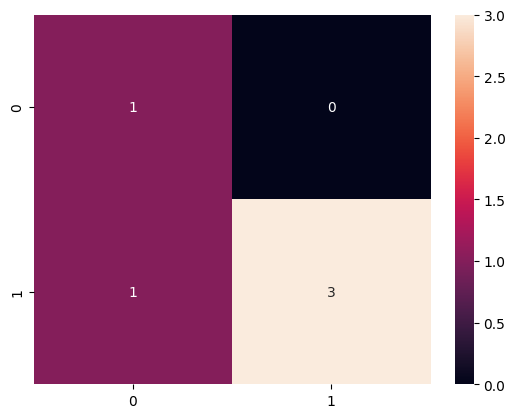

In [29]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score:", score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# Train on the entire dataset

In [30]:
clf = XGBClassifier(n_jobs=-1)
clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

# Read the test dataset & sample submission

In [31]:
test = pd.read_csv("./input/test.csv")
test.drop(columns="id", inplace=True)
submission = pd.read_csv("./input/sample_submission.csv")

# Predicting on test dataset

In [32]:
pred = clf.predict(test)
mapping = {
    0: "False",
    1: "True",
    
}

pred = np.array([mapping[x] for x in pred])
pred

array(['False', 'False', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'True', 'True', 'True', 'False', 'False',
       'False', 'False'], dtype='<U5')

In [33]:
submission["Target"] = pred
submission

,id,Target,Location,Date
0,23,False,Auckland,A Few Days Ago
1,24,False,Wellington,A Few Days Ago
2,25,False,Christchurch,A Few Days Ago
3,26,False,Dunedin,A Few Days Ago
4,27,False,Rotorua,A Few Days Ago
5,28,False,Hamilton,A Few Days Ago
6,29,False,Queenstown,A Few Days Ago
7,30,True,Nelson,A Few Days Ago
8,31,False,Palmerston North,A Few Days Ago
9,32,False,Tauranga,A Few Days Ago


# Submitting the prediction

In [34]:
submission.to_csv("submission.csv", index=False)